# SLO Twitter Data Analysis  - Retweet Statistics

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [7]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


<span style="font-family:Papyrus; font-size:1.25em;">

**Note: Retweet text ARE included in the "retweeted_status" meta object.**<br>

</span>

## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">

This code cell provides statistics on whether a Tweet is Retweet across the entire dataset as well as when grouped by the companies each is associated with.<br>

</span>

In [5]:
    print(f"ReTweeted Statistics for entire Twitter dataset:")
    print(tweet_dataframe["retweeted_derived"].value_counts())
    print(tweet_dataframe["retweeted_derived"].value_counts(normalize=True))
    print()

    print(f"ReTweeted Statistics for Tweets by Company for entire Twitter dataset:")
    print(tweet_dataframe.groupby(['company_derived_designation', "retweeted_derived"]).size())
    print()

ReTweeted Statistics for entire Twitter dataset:
True     446177
False    224249
Name: retweeted_derived, dtype: int64
True     0.665512674031
False    0.334487325969
Name: retweeted_derived, dtype: float64

ReTweeted Statistics for Tweets by Company for entire Twitter dataset:
company_derived_designation  retweeted_derived
adani                        False                109457
                             True                 321565
bhp                          False                 37863
                             True                  26484
cuesta                       False                   464
                             True                    154
fortescue                    False                  7510
                             True                   4262
iluka                        False                  2589
                             True                    494
multiple                     False                  3587
                             True              

In [ ]:
# TODO - implement normalized (percentage values) for ReTweets grouped by associated companies.

<span style="font-family:Papyrus; font-size:1.25em;">
    
It seems most of the Tweets in our dataset are ReTweets.  If we removed the ReTweets associated with Adani, we would have a more balanced dataset.<br>
    
</span>

## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">

Plot of whether a Tweet is a ReTweet or Not by the company they are associated with.  Y-axis depicts the percentage of all Tweets for that company.  X-axis left bar depicts Non-Retweets and right bar depicts ReTWeets.<br>

</span>

Percentage of All Tweets for a Company that Are or Aren't ReTweets: 


<Figure size 432x288 with 0 Axes>

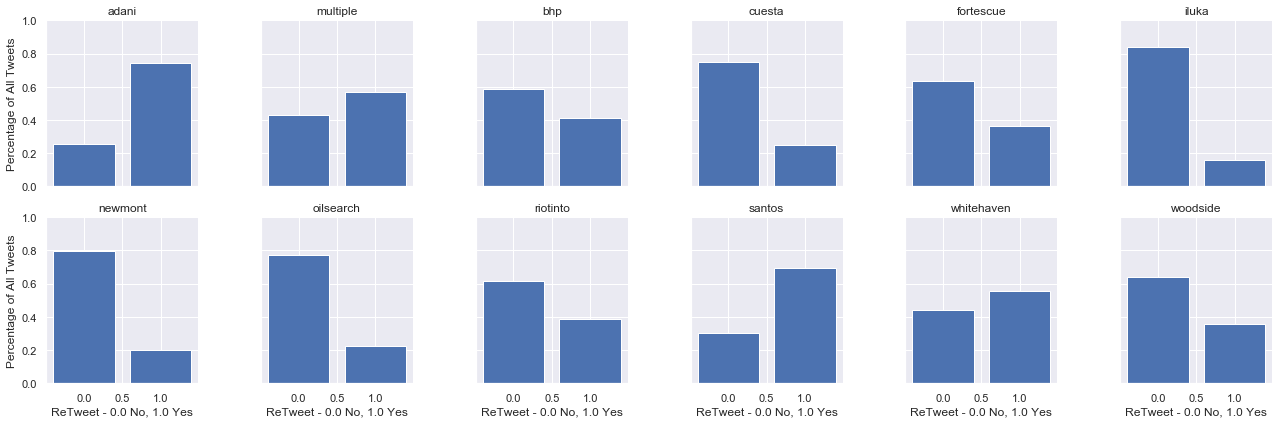

In [3]:
    print(f"Percentage of All Tweets for a Company that Are or Aren't ReTweets: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[["retweeted_derived", 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util_v2.bar_plot, "retweeted_derived")
    grid.set_titles('{col_name}')
    grid.set_xlabels("ReTweet - 0.0 No, 1.0 Yes").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We see that most Tweets about "Adani" are ReTweets while most Tweets for many of the other companies are not ReTweets.<br>

</span>

## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">

Plot of the ReTweet counts for each Tweet against what percentage Tweets with that specific ReTweet count value make up the entire Twitter dataset.<br> 

</span>

Percentage Composition of All Tweets for a Company for Most ReTweeted Tweets by their ReTweet Counts:


<Figure size 432x288 with 0 Axes>

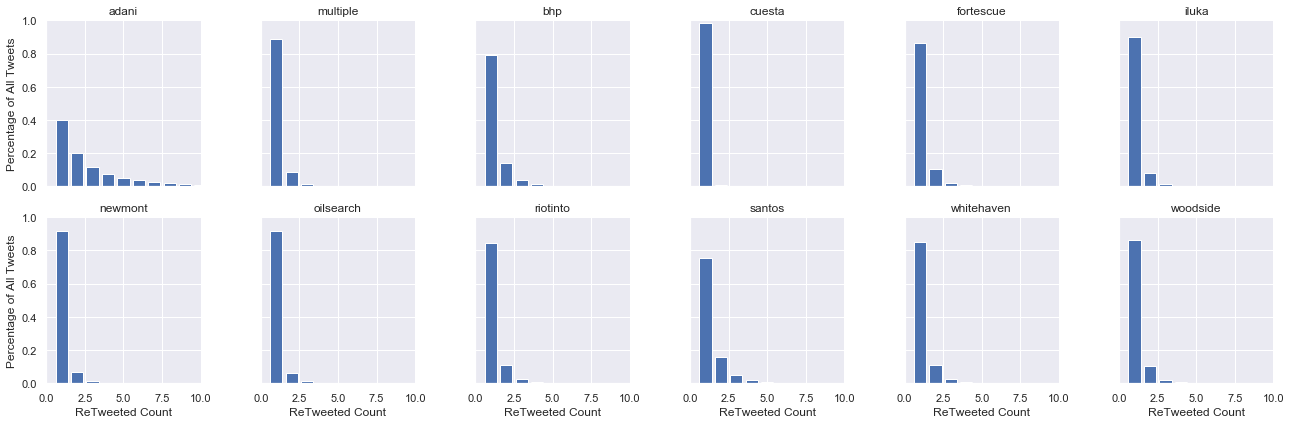

In [4]:
    plt.figure()
    print(f"Percentage Composition of All Tweets for a Company for Most ReTweeted Tweets by their ReTweet Counts:")
    grid = sns.FacetGrid(tweet_dataframe[['tweet_id', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(0, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot_zipf, 'tweet_id')
    grid.set_titles('{col_name}')
    grid.set_xlabels('ReTweeted Count').set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We can see that for Adani the ReTweet count can go up quite high.  However, for the the other companies the ReTweet count does not go much past 3 or so.<br>

</span>

## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">
    
We compute statistics for the ReTweet count for the most ReTweeted Tweets.<br>
   
</span>

In [5]:
    print(f"\nReTweet counts for the Top (most) Retweeted Tweets.\n")
    print(tweet_dataframe[['company_derived_designation', 'tweet_id']].groupby('company_derived_designation')
          .apply(lambda x: x['tweet_id'].value_counts().value_counts(normalize=False)
                 .sort_index(ascending=False).head(3)))


ReTweet counts for the Top (most) Retweeted Tweets.

company_derived_designation     
adani                        387      1
                             350      1
                             338      1
bhp                          39       1
                             34       1
                             31       2
cuesta                       4        2
                             2        7
                             1      596
fortescue                    9        1
                             8        2
                             7        5
iluka                        6        1
                             4       11
                             3       36
multiple                     10       1
                             9        1
                             8        1
newmont                      4        3
                             3        9
                             2       57
oilsearch                    6        1
                             5   

<span style="font-family:Papyrus; font-size:1.25em;">

Unsurprisingly at this point, Adani Tweets have the highest counts for ReTweets.<br>

**TODO: Understand what the values in the right column represent.  Are they the number of Tweets with that count?**

</span>

## Subtitle Placeholder:

<span style="font-family:Papyrus; font-size:1.25em;">

Statistics that give the Tweet ID of the most ReTweeted Tweets and what percentage of the entire dataset they comprise.<br>

</span>

In [11]:
    print(
        f"\nWhat Percentage of All Tweets for Given Company across the entire dataset does the Top (most) Retweeted "
        f"Tweets Comprise?.\n")
    print(tweet_dataframe[['company_derived_designation', 'tweet_id']].groupby('company_derived_designation')
          .apply(lambda x: x['tweet_id'].value_counts(normalize=True).head(5)))


What Percentage of All Tweets for Given Company does the Top (most) Retweeted Tweets Comprise?.

company_derived_designation                    
adani                        9.147970000000e+17    0.000897866002
                             9.147960000000e+17    0.000812023516
                             9.147980000000e+17    0.000784182710
                             9.147950000000e+17    0.000702980358
                             9.147910000000e+17    0.000702980358
bhp                          7.042410000000e+17    0.000606088862
                             7.042490000000e+17    0.000528385162
                             7.042430000000e+17    0.000481762942
                             7.042470000000e+17    0.000481762942
                             7.042480000000e+17    0.000466222202
cuesta                       3.112840000000e+17    0.006472491909
                             3.047670000000e+17    0.006472491909
                             6.167630000000e+17    0.003236245

<span style="font-family:Papyrus; font-size:1.25em;">

The higher the percentage values given in the right column, the more popular a Tweet is and the more they were ReTweeted and the more they weigh heavily as part of that company's set of associated Tweets.<br>

**TODO: Confirm our interpretation is correct and fix the Tweet ID output.**

</span>

## Subtitle Placeholder:

In [9]:
    print("Note: These values based on 'retweeted_derived' boolean attribute:")

    yes_reweeted = tweet_dataframe.loc[tweet_dataframe['retweeted_derived'] == True]
    print(f"The number of Re-Tweets in the dataset: {yes_reweeted.shape}")
    no_reweeted = tweet_dataframe.loc[tweet_dataframe['retweeted_derived'] == False]
    print(f"The number of Non Re-Tweets in the dataset: {no_reweeted.shape}")

    print(f"The percentage of Tweets that are ReTweets in the dataset: "
          f"{yes_reweeted.shape[0] / tweet_dataframe.shape[0]}")
    print(f"The percentage of Tweets that are not ReTweets in the dataset: "
          f"{no_reweeted.shape[0] / tweet_dataframe.shape[0]}")

Note: These values based on 'retweeted_derived' boolean attribute:
The number of Re-Tweets in the dataset: (446177, 50)
The number of Non Re-Tweets in the dataset: (224249, 50)
The percentage of Tweets that are ReTweets in the dataset: 0.6655126740311385
The percentage of Tweets that are not ReTweets in the dataset: 0.3344873259688616


<span style="font-family:Papyrus; font-size:1.25em;">

Approximately 2/3rd of our dataset is comprised of ReTweets.<br>

</span>

In [11]:
    has_retweeted_text = tweet_dataframe.loc[tweet_dataframe["retweeted_status_full_text"].notnull()]
    print(f"# of re-tweets with included original text of the original re-tweeted Tweet is: "
          f"{has_retweeted_text.shape}")
    print(f"# of re-tweets without included original text of the original re-tweeted Tweet is: "
          f"{yes_reweeted.shape[0] - has_retweeted_text.shape[0]}")

# of re-tweets with included original text of the original re-tweeted Tweet is: (445533, 50)
# of re-tweets without included original text of the original re-tweeted Tweet is: 644


<span style="font-family:Papyrus; font-size:1.25em;">

We have the original ReTweeted Tweet's full text for most, but not all, of our Tweets in our dataset.<br>

</span>

In [15]:
    retweet_frequency = tweet_dataframe[["tweet_id", "tweet_retweet_count"]]
    print("Tweet ID's and ReTweet Count for the Original ReTweeted Tweet (Descending head):")
    print(retweet_frequency.sort_values(by=["tweet_retweet_count"], ascending=False).head(10))

Tweet ID's and ReTweet Count for the Original ReTweeted Tweet (Descending head):
                  tweet_id  tweet_retweet_count
498071  9.834100000000e+17                98886
634814  9.733910000000e+17                24691
633506  9.682780000000e+17                24639
633518  9.683350000000e+17                24639
633529  9.683710000000e+17                24639
633624  9.685870000000e+17                24635
633603  9.685520000000e+17                24635
498325  9.929570000000e+17                23823
498337  9.932440000000e+17                23823
498336  9.931420000000e+17                23823


<span style="font-family:Papyrus; font-size:1.25em;">

According to this, we have a few original ReTweeted Tweets whose ReTweet counts are ridiculously high.<br>

**TODO: Fix the Tweet ID output.**

</span>

In [16]:
    print("Retweet counts by company:")
    yes_by_company = \
        pd.DataFrame(yes_reweeted).groupby(["company_derived_designation"]).size().reset_index(name="counts")
    print(f"{yes_by_company}\n")
    print("Non Retweet counts by company:")
    no_by_company = \
        pd.DataFrame(no_reweeted).groupby(["company_derived_designation"]).size().reset_index(name="counts")
    print(f"{no_by_company}\n")

Retweet counts by company:
   company_derived_designation  counts
0                        adani  321565
1                          bhp   26484
2                       cuesta     154
3                    fortescue    4262
4                        iluka     494
5                     multiple    4691
6                      newmont     181
7                    oilsearch     349
8                     riotinto    9847
9                       santos   64060
10                  whitehaven    8208
11                    woodside    5567

Non Retweet counts by company:
   company_derived_designation  counts
0                        adani  109457
1                          bhp   37863
2                       cuesta     464
3                    fortescue    7510
4                        iluka    2589
5                     multiple    3587
6                      newmont     720
7                    oilsearch    1207
8                     riotinto   15652
9                       santos   27948
10   

<span style="font-family:Papyrus; font-size:1.25em;">

Similar to the ReTweet count statistics provided at the beginning of this notebook file only separated between ReTweets and non-ReTweets into two separate groups according to associated company.<br>

</span>